In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import astropy.units as u
import galsim as gs
sys.path.insert(0, "/home/jiachuan/kl-tools_spencer/kl_tools")
sys.path.insert(0, "/home/jiachuan/kl-tools_spencer/kl_tools/grism_modules")
from tngsim import TNGsimulation as ts
import cube
import emission
import grism
from emission import LINE_LAMBDAS

In [2]:
z = 0.5
subhalo = ts()
subhalo.set_subhalo(subhaloid=2, redshift=z)

closest snapshot to desired redshift 0.5 is at http://www.tng-project.org/api/TNG50-1/snapshots/67/ 
1 / (cm2 s) solMass W / (kg m2 nm)


UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

In [ ]:
#   - pixel scale [arcsec/pixel, scalar]
#   - vector of wavelength spaxel centers [angstroms]
#   - spectral resolution [ scalar float, lambda/delta_lambda]
#   - redshift (default to _requested_ subhalo redshift) [scalar float]
#   - dimensions of the datacube [nlam, nx, ny]
wave_grid = np.linspace(9000, 12000, 300)
dlam = wave_grid[1:] - wave_grid[:-1]
bandpasses = [gs.Bandpass(
            1.0, 'A', blue_limit=il-dl, red_limit=il+dl, zeropoint=22.5
            ) for il,dl in zip(wave_grid, dlam/2.)]

line_pars_dict = {
    'value': LINE_LAMBDAS['Ha'].value,
    'R': 461*(LINE_LAMBDAS['Ha']*(1+subhalo.redshift)/(1*u.micron)).to('1').value,
    'z': subhalo.redshift, 
    'unit': LINE_LAMBDAS['Ha'].unit,
}
sed_pars_dict = {
    'lblue': wave_grid[0],
    'lred': wave_grid[-1],
    'resolution': 10,
    'unit': u.Angstrom,
}
Ha_line = emission.EmissionLine(line_pars_dict, sed_pars_dict)
pars_dict = {
    'pix_scale': 0.11,
    'shape': [wave_grid.shape[0]-1, 60, 60],
    'emission_lines': [Ha_line],
    #'psf': ,
    'bandpasses': bandpasses,
}

pars = cube.CubePars(pars_dict)

dc = subhalo.to_cube(pars)

In [ ]:

cb = plt.imshow(np.sum(dc._data, axis=0), origin='lower')
plt.colorbar(cb)

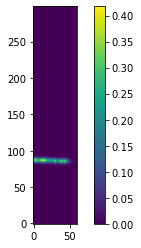

In [5]:
cb = plt.imshow(np.sum(dc._data, axis=1), origin='lower')
plt.colorbar(cb)

In [8]:
inds = np.arange(subhalo._particleData['PartType0']['Coordinates'][:,0].size)[(subhalo._line_flux.value > 1e-5) & (np.isfinite(subhalo._line_flux.value))]
deltav = subhalo._particleData['PartType0']['Velocities'][:,2] * np.sqrt(1./(1+subhalo.redshift)) * u.km/u.s
deltav = deltav[inds]

In [25]:
inds = np.arange(subhalo._particleData['PartType0']['Coordinates'][:,0].size)[(subhalo._line_flux.value > 1e-5) & (np.isfinite(subhalo._line_flux.value))]

In [5]:
subhalo.redshift

0.5

In [ ]:
def _grism_photon_distribution(modelcube, modelmesh, image, image_coord, offset, Rspec, ):
    ''' distribute photons in the 3d model cube into 2d dispersed grism image
    
    Inputs:
    =======
        - modelcube: np.ndarray
            The 3d model cube. Values are in units of [photons/sec/cm2]
        - modelmesh: np.ndarray
            The 2d meshgrid of coordiates
    '''
    

## Scratch Below

In [27]:
PartG = subhalo._particleData['PartType0']
PartSW = subhalo._particleData['PartType4']

In [9]:
subhalo._particleData.keys()

<KeysViewHDF5 ['Header', 'PartType0', 'PartType1', 'PartType4', 'PartType5']>

In [11]:
subhalo._particleData['PartType0'].keys()

<KeysViewHDF5 ['CenterOfMass', 'Coordinates', 'Density', 'ElectronAbundance', 'EnergyDissipation', 'GFM_AGNRadiation', 'GFM_CoolingRate', 'GFM_Metallicity', 'GFM_Metals', 'GFM_MetalsTagged', 'GFM_WindDMVelDisp', 'GFM_WindHostHaloMass', 'InternalEnergy', 'Machnumber', 'MagneticField', 'MagneticFieldDivergence', 'Masses', 'NeutralHydrogenAbundance', 'ParticleIDs', 'Potential', 'StarFormationRate', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities']>

In [26]:
subhalo._particleData['PartType4'].keys()

<KeysViewHDF5 ['BirthPos', 'BirthVel', 'Coordinates', 'GFM_InitialMass', 'GFM_Metallicity', 'GFM_Metals', 'GFM_MetalsTagged', 'GFM_StellarFormationTime', 'GFM_StellarPhotometrics', 'Masses', 'ParticleIDs', 'Potential', 'StellarHsml', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities']>

In [18]:
subhalo._particleData['PartType0/Coordinates'][0]

array([ 7090.34009336, 23504.87221613, 19960.84156963])

In [19]:
subhalo._particleData['PartType0/CenterOfMass'][0]

array([ 7089.869, 23505.225, 19960.674], dtype=float32)

In [23]:
subhalo._particleData['PartType0/Velocities'][:]

array([[850.86584 , 554.5735  , 565.90466 ],
       [430.78275 ,  43.473965, 458.3545  ],
       [960.801   , 542.3647  , 810.2293  ],
       ...,
       [477.21945 , 410.59344 , 774.37366 ],
       [638.70496 , 578.7693  , 693.1923  ],
       [405.11935 , 245.05135 , 601.71936 ]], dtype=float32)

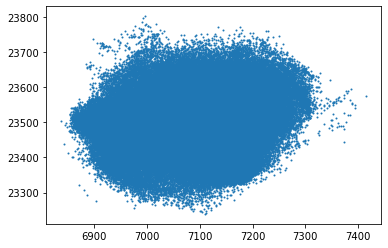

In [32]:
plt.scatter(PartSW['Coordinates'][:,0], PartSW['Coordinates'][:,1], 1)

In [34]:
attrs = vars(subhalo)

In [36]:
attrs.keys()

dict_keys(['base_url', 'cosmo', 'redshift', '_sim_name', '_snapshot', '_subhalo', '_cachefile', '_particleData', '_particleTemp', '_starFlux', '_line_flux'])

In [37]:
subhalo.redshift

0.5

In [40]:
 LINE_LAMBDAS['Ha'].value

6564.589

In [6]:
u.Angstrom

Unit("Angstrom")

In [11]:
(u.Unit('Angstrom')/u.cm).to('1')

1.0000000000000002e-08